In [285]:
import numpy as np
from plt3d_ import MATSHOW_3D_abs as ms
from matplotlib import pyplot as plt

In [286]:
IMG = np.load('IMG.npy')

In [287]:
print(IMG.shape)

(21135, 40, 32, 32)


In [288]:
IMG = np.transpose(IMG,(0,2,3,1))

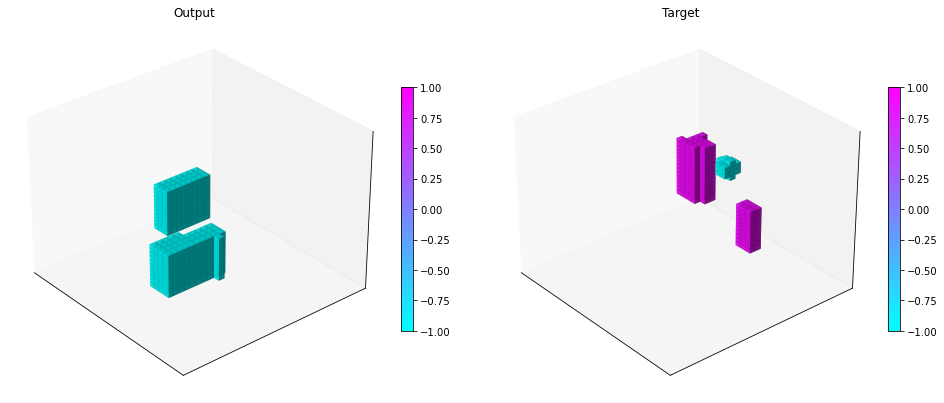

In [5]:
ms(IMG[1],IMG[20000])

In [289]:
f= np.fft.fftn(IMG[20000],axes=(0,1,2))  # f是一个复数数组
fshift = np.fft.fftshift(f,axes = (0,1,2))
fshiftb = np.fft.fftshift(fshift,axes = (0,1,2))

In [290]:
f.shape

(32, 32, 40)

In [291]:
fft_img = 20 * np.log(np.abs(f))
fftshift_img = 20 * np.log(np.abs(fshift))
fftshiftb_img = 20 * np.log(np.abs(fshiftb))
fft_img = 2.*(fft_img - np.min(fft_img))/np.ptp(fft_img)-1
fftshift_img = 2.*(fftshift_img - np.min(fftshift_img))/np.ptp(fftshift_img)-1
fftshiftb_img = 2.*(fftshiftb_img - np.min(fftshiftb_img))/np.ptp(fftshiftb_img)-1

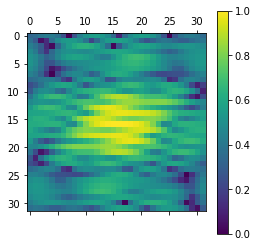

In [292]:
plt.matshow(fftshift_img[:,:,20])
plt.colorbar()
plt.clim(0,1)

In [196]:
w,l,h = 32,32,40  # High pass
mask100 = np.zeros((w,l,h), np.uint8)
filter=10
mask100[int(w/2-filter):int(w/2+filter), int(l/2-filter):int(l/2+filter), int(h/2-filter*1.25):int(h/2+filter*1.25)] = 1.
print(np.sum(mask100),32*32*40)

10000 40960


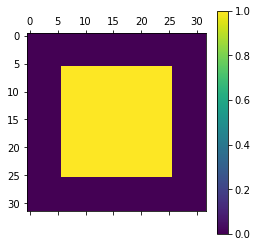

In [197]:
plt.matshow(mask100[:,:,25])
plt.colorbar()
plt.clim(0,1)

In [198]:
fshift_masked = fshift*mask100

In [199]:
fshift_masked.shape

(32, 32, 40)

In [200]:
fshift_masked_b = np.fft.fftshift(fshift_masked,axes=(0,1,2))

In [201]:
_img =np.fft.ifftn(fshift_masked_b,axes=(0,1,2))

In [202]:
_img.shape

(32, 32, 40)

In [203]:
np.max(_img)

(1.3650060996841908+0.022685050987104396j)

In [204]:
_img = np.clip(_img,-1,1)

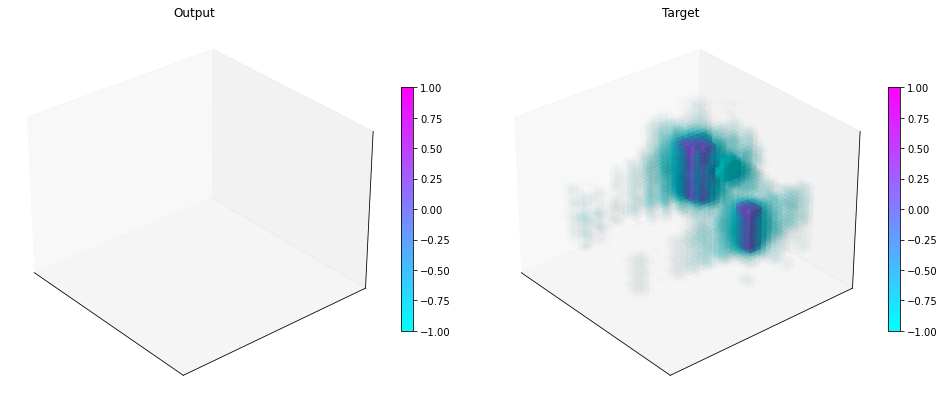

In [205]:
ms(np.zeros((32,32,40)),np.real(_img))

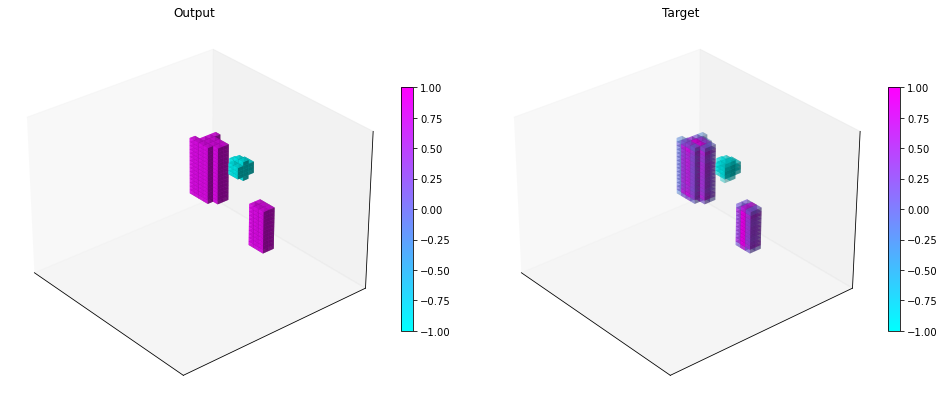

In [293]:
thed = np.real(_img)
thed[np.abs(thed)<0.3]=0
ms(np.real(img),np.real(thed))

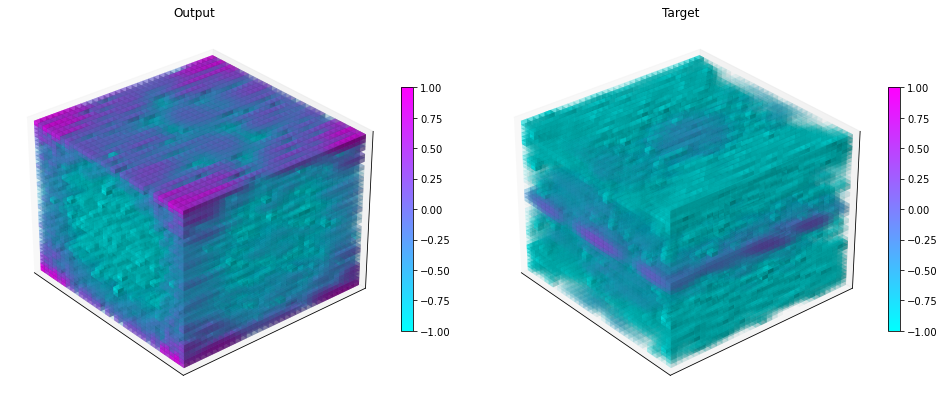

In [149]:
ms(fft_img,fftshift_img)

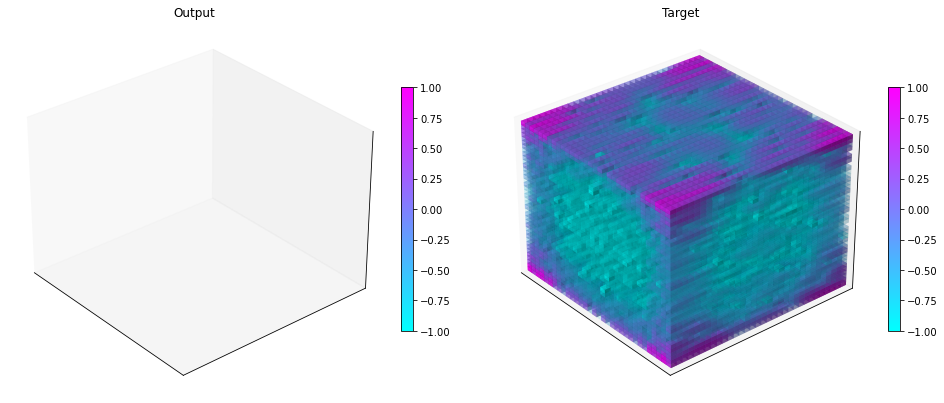

In [174]:
ms(np.zeros((32,32,40)),fftshiftb_img)

In [94]:
img = np.fft.ifftn(f,axes=(0,1,2))
img_shift =np.fft.ifftn(fshift,axes=(0,1,2))

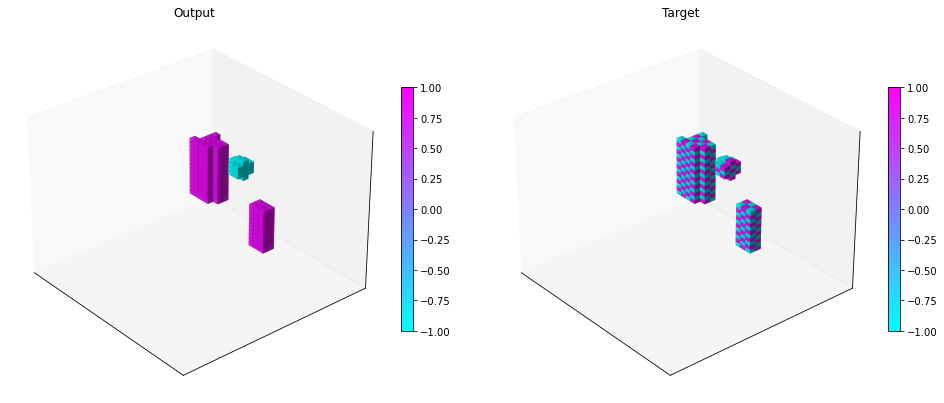

In [29]:
ms(np.real(img),np.real(img_shift))

In [317]:
w,l,h = 32,32,40  # Low pass
mask1 = np.zeros((w,l,h), np.uint8)
filter=15
mask1[int(w/2-filter):int(w/2+filter), int(l/2-filter):int(l/2+filter), int(h/2-filter*1.25):int(h/2+filter*1.25)] = 1
print(np.sum(mask1),32*32*40)

33300 40960


In [311]:
w,l,h = 32,32,40  # High pass
mask0 = np.ones((w,l,h), np.uint8)
filter=15
mask0[int(w/2-filter):int(w/2+filter), int(l/2-filter):int(l/2+filter), int(h/2-filter*1.25):int(h/2+filter*1.25)] = 0
print(np.sum(mask0),32*32*40)

7660 40960


In [149]:
mask0.shape

(32, 32, 40)

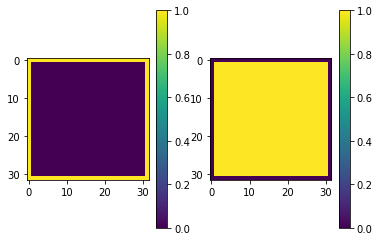

In [312]:
from matplotlib import pyplot as plt
plt.subplot(1,2,1)
plt.imshow(mask0[:,:,15])
plt.colorbar()
plt.clim(0,1)
plt.subplot(1,2,2)
plt.imshow(mask1[:,:,15])
plt.colorbar()
plt.clim(0,1)
plt.show()

In [313]:
f_masked0 = f*mask0

In [302]:
f_masked1 = f*mask1

In [314]:
img_masked0 = np.fft.ifftn(f_masked0,axes=(0,1,2))
img_masked1 = np.fft.ifftn(f_masked1,axes=(0,1,2))

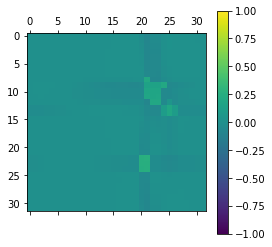

In [319]:
plt.matshow(np.real(img_masked1)[:,:,18])
plt.colorbar()
plt.clim(-1,1)

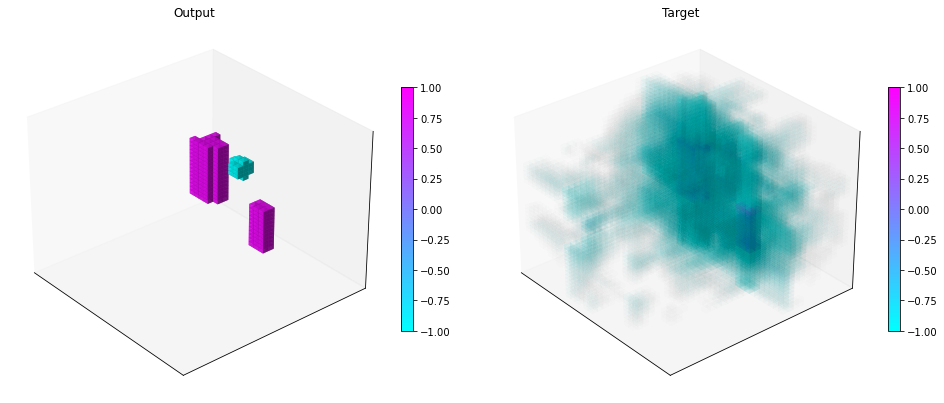

In [316]:
ms(np.real(img),np.real(img_masked1))

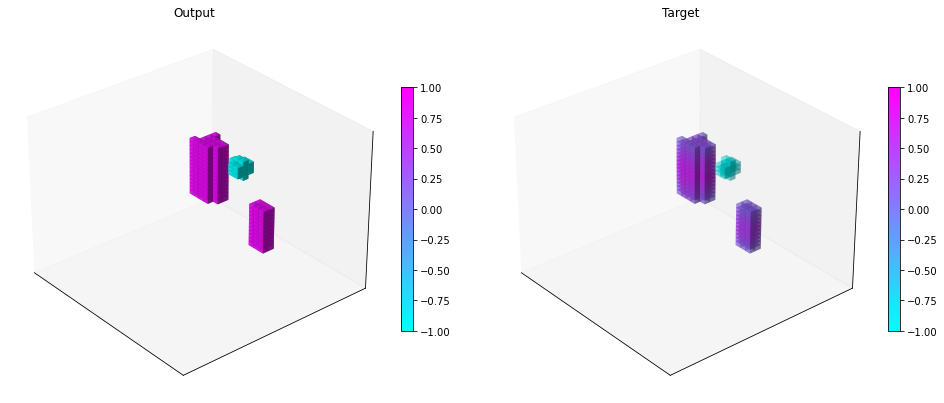

In [307]:
thed = np.real(img_masked0)
thed[np.abs(thed)<0.3]=0
ms(np.real(img),np.real(thed))

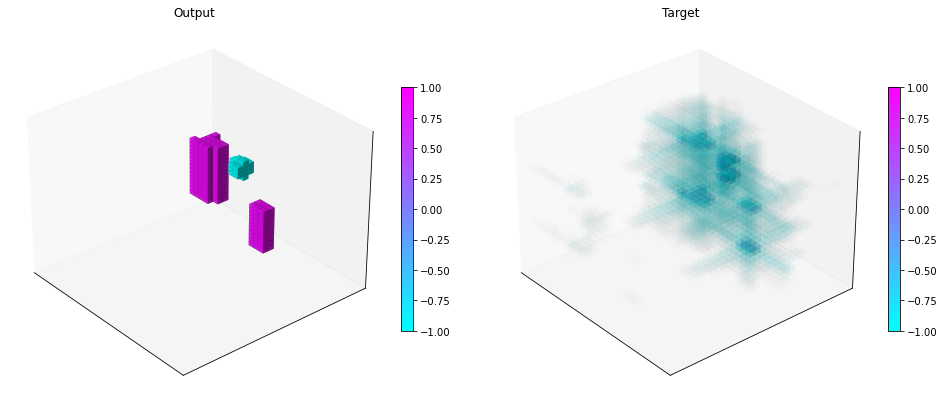

In [99]:
ms(np.real(img),np.real(img_masked1))

In [250]:
w,l,h = 32,32,40  # High pass
mask0 = np.ones((w,l,h), np.uint8)
filter=15
mask0[int(w/2-filter):int(w/2+filter), int(l/2-filter):int(l/2+filter), int(h/2-filter*1.25):int(h/2+filter*1.25)] = 0
print(np.sum(mask0),32*32*40)

7660 40960


In [252]:
mask0.shape


(32, 32, 40)

In [235]:
mask0=mask0.astype('int64')

In [233]:
mtx = np.zeros((7660,32,32,40))

In [ ]:
from tqdm import tqdm

In [259]:
z=0

for i in range(32):
    for j in range(32):
        for k in range(40):
            if mask0[i,j,k] == 1:
                mtx[z,i,j,k]=1
                z+=1            
print(z)

7660


In [265]:
c = np.einsum("ab,bcde->cde", np.ones((1,7660)), mtx)

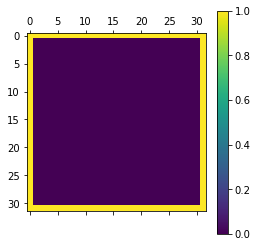

In [275]:
plt.matshow(c[:,:,25])
plt.colorbar()

In [270]:
np.save('mtx.npy',mtx)

In [246]:
for i in range(2):
    print(i)


0
1


In [7]:
32*32*40*7660

313753600

In [ ]:
i